In [ ]:
# 1.值范围 2.相似线段形态 3.highlight落在区间内 4.方差大

In [15]:
import json
import uuid
branch = ['A','B','C','D','E','F','G','H','I','J','K','L']
config = {'search':[], 'insight':[], 'chart':[], 'statistic':[]}
for index in range(12):
    item = {}
    item['alias'] = 'search_branch' + str(branch[index])
    item['desc'] = 'Branch ' + str(branch[index]) + ' common use KeyValue and Mark'
    item['exp_search'] = '(txlProcBranch'+str(branch[index])+'|TxBranchCtrl'+str(branch[index])+').*(txAtt|linearization fault|external fault)'
    item['exp_extract'] = [
                        "{}[{timestamp}] {}txAtt:{txAtt:d}, {}torTemperature:{torTemperature:d} {}avgIMpa0:{avgIMpa0:d} {}",
                        "{}[{timestamp}] {}"
                        ]
    item['exp_mark'] = [{"alias":"LF","exp":"linearization fault","color":"#f00000"}]
    item['is_case_sensitive'] = True
    item['forward_rows'] = 0
    item['backward_rows'] = 0
    config['search'].append(item)

# for index in range(12):
#     item = {}
#     item['alias'] = 'insight_branch' + str(branch[index])
#     item['desc'] = 'Branch Insight' + str(branch[index])
#     item['exp_search'] = '(txlProcBranch'+str(branch[index])+'|TxBranchCtrl'+str(branch[index])+')'
#     item['exp_extract'] = "{}[{timestamp:ti}]{}, msg = {msg}"
#     item['exp_mark'] = {"alias":"LF","exp":"linearization fault","color":"#f00000"}
#     item['is_case_sensitive'] = True
#     item['forward_rows'] = 0
#     item['backward_rows'] = 0
#     config['insight'].append(item)

for index in range(12):
    item = {}
    item['alias'] = 'statistic_branch' + str(branch[index])
    item['desc'] = 'Branch ' + str(branch[index]) + ' statistic txAtt'
    item['code'] = "self.result = self.text_file_model.alias_data['" + 'search_branch' + str(branch[index]) + "'].res_key_value['txAtt']['global_index']"
    config['statistic'].append(item)
    
json_object = json.dumps(config)
with open("D:\\projects\\ericsson_flow\\new_files\\config1.txt", "w") as outfile:
    outfile.write(json_object)

In [ ]:
import json
config = {'search':[], 'insight':[], 'chart':[], 'statistic':[]}

item1 = {}
item1['alias'] = 'PackageName'
item1['desc'] = 'Elog package restart name'
item1['exp_search'] = '_R13C193'
item1['exp_extract'] = [
                    "[{tmp1}] {}LMC ID: {packname}\n[{tmp2}] {}\n[{tmp3}] {}\n[{tmp4}] {}\n[{tmp5}] {}\n[{timestamp}] {}"
                    ]
item1['exp_mark'] = []
item1['is_case_sensitive'] = True
item1['forward_rows'] = 0
item1['backward_rows'] = 5
config['search'].append(item1)

item2 = {}
item2['alias'] = 'ErrorName'
item2['desc'] = 'ABN: raiseFaultAndRollback'
item2['exp_search'] = 'ABN: raiseFaultAndRollback'
item2['exp_extract'] = [
                    "[{timestamp}] {}ABN: {errorname} {}"
                    ]
item2['exp_mark'] = []
item2['is_case_sensitive'] = True
item2['forward_rows'] = 0
item2['backward_rows'] = 0
config['search'].append(item2)

json_object = json.dumps(config)
with open("D:\\projects\\ericsson_flow\\new_files\\cooper_config.txt", "w") as outfile:
    outfile.write(json_object)

In [13]:
import re
from parse import parse

str1 = 'BXP_3: [2022-11-23 22:04:44.572174570] (+0.000333470) radio6626 com_ericsson_trithread:INFO: { cpu_id = 1 }, { process = "txlProcBranchB", fileAndLine = "dpdController.cc:1887", msg = "txAtt:289, txAttPeak:0, dpGainLoopEnable:true, dpGainCtrlType:DSA_AD_TXFE, torTemperature:495 (0.1C), torGainBackoff:0 (0.01dB), torGainLin:3.49543(0.01dB), torStepBit:6, cc0Ctrl1=0x00000118 , avgIMpa0:1980 [mAmp]" }'
# str2 = 'BXP_3: [2022-12-10 15:55:26.739019220] (+0.000025340) radio6626 com_ericsson_trithread:INFO: { cpu_id = 1 }, { process = "TxBranchCtrlB", fileAndLine = "txChangeCycleHelper.cc:264", msg = "Txl branch J restart due to txL linearization fault!" }'
# str1 = "BXP_2: [221120 164014] 27: PA measured values for driver name: DpaVddSv:7; value: 26992; branch Id: 7"
# exp = "\[%{TIMESTAMP:time}\] \(%{STRING:cost}\) "
# exp = "\[%{TIMESTAMP:time}\] %{DROP:tmp}Pma:%{FLOAT:Pma0}\[%{DROP:tmp1}DpdPma:%{FLOAT:DpdPma0}\[%{DROP:tmp2}Pmb:%{FLOAT:Pmb}, TorPmb:%{FLOAT:TorPmb0}\[%{FLOAT:TorPmb1} %{FLOAT:TorPmb2}\] "
exp_search = '(txlProcBranchB|TxBranchCtrlB).*(txAtt|linearization fault)'
exp_extract = '{}[{timestamp}] {}txAtt:{txAtt:d}, {}torTemperature:{torTemperature:d} {}avgIMpa0:{avgIMpa0:d} {}'
r_search = re.findall(exp_search, str1)
r_extract = parse(exp_extract, str1)
print(r_search)
print(r_extract.named)

[('txlProcBranchB', 'txAtt')]
{'timestamp': '2022-11-23 22:04:44.572174570', 'txAtt': 289, 'torTemperature': 495, 'avgIMpa0': 1980}


In [ ]:
from parse import parse
# str1 = [
#     "221211-00:51:48 10.69.81.43 22.0n MSRBS_NODE_MODEL_22.Q2_566.28125.116_3317 stopfile=/tmp/21234\n",
#     "coli>/fruacc/lhsh BXP_5 ts r\n",
#     "Board                     : 45.2 C\n",
#     "DcPaVdd:0                 : 57.3 C\n",
#     "DcPaVdd:1                 : 57.8 C\n",
#     "DcPaVdd:2                 : 50.1 C\n",
#     "DcPaVdd:3                 : 50.6 C\n",
#     "DcTrxVcc                  : 48.3 C\n"
# ]

st1 = ['221211-00:50:33 10.69.81.43 22.0n MSRBS_NODE_MODEL_22.Q2_566.28125.116_3317 stopfile=/tmp/21234\n', 'coli>/fruacc/lhsh BXP_5 ts r\n', 'Board                     : 33.2 C\n', 'DcPaVdd:0                 : 43.7 C\n', 'DcPaVdd:1                 : 44.3 C\n', 'DcPaVdd:2                 : 37.4 C\n', 'DcPaVdd:3                 : 37.7 C\n', 'DcTrxVcc                  : 48.9 C\n']
str2 = '\n'.join(str1)
r = parse("{timestamp} {}DcPaVdd:0                 : {temp:f} C{}", str2)
r

In [ ]:
tmp = pd.DataFrame(text_analysis_model.alias_data['insight_branchJ'].res_key_value['txAtt_float'])
tmp.loc[[2,3,4],:]

In [1]:
import matplotlib.pyplot as plt  # for display purposes
import ruptures as rpt  # our package
import pandas as pd
import numpy as np
import re
import json
from text_analysis import TextAnalysisModel

import spacy
nlp = spacy.load("en_core_web_sm")

import en_core_web_sm
nlp = en_core_web_sm.load()

text_analysis_model = await TextAnalysisModel('parallel', mode = 'test')

file_path = ['D:\\Projects\\ericsson_flow\\new_files\\E55G948878_LE_SARONGGE_BXP_6_telog.log']
config_path = 'D:\\Projects\\ericsson_flow\\new_files\\config2.txt'

await text_analysis_model.file_container_model.on_new_file('', file_path)
await text_analysis_model.file_container_model.on_load_config('', config_path)

In [2]:
timestamp = ''
res_mark = text_analysis_model.alias_data['insight_branchJ'].res_mark
for mark in res_mark.keys():
    timestamp = res_mark[mark]['timestamp'][0]
timestamp

'2022-12-10 15:55:26.739019'

In [ ]:
special_words = set(['timeout', 'fault', 'error', 'abn', 'shutdown'])
filter_words = ['db', 'mamp']

def self_clean_special_symbols(text, symbol):
    for ch in ['.', '_','-']:
        if ch in text:
            text = text.replace(ch,symbol)
    text = re.sub(r'\d+', '', text)
    return re.sub(symbol+"+", symbol, text)
        
def string_filter(df):
    text = self_clean_special_symbols(df['value'], ' ')
    words = []
    for w in text.strip().split(' '):
        w = w.lower()
        if len(w) > 0:
            if (not w[0].isdigit()) & (w not in filter_words):
                words.append(w)
                
    if len(set(words).intersection(special_words)) > 0:
        return False
            
    if len(words) < 2:
        return True
    
    doc = nlp(' '.join(words))
    pos = [w.pos_ for w in doc]
        
    if len(set(pos).intersection(set(['VERB', 'AUX']))) > 0:
        return False
    else:
        return True

res_residue_marks = pd.DataFrame(text_analysis_model.alias_data['insight_branchJ'].res_residue_marks)
res_residue_marks = res_residue_marks.loc[(res_residue_marks['timestamp'] < timestamp), :]
res_residue_marks['is_filter'] = res_residue_marks.apply(string_filter, axis=1)
res_residue_marks = res_residue_marks.loc[(res_residue_marks['is_filter'] == False), :].reset_index(drop=True)
res_residue_marks = res_residue_marks.drop(columns=['is_filter'])
res_residue_marks

In [ ]:
def self_clean_special_symbols(text, symbol):
    for ch in ['::', '/','{','}','[',']','(',')','#','+','!',';',',','"','\'','@','`','$','^','&','|','\n']:
        if ch in text:
            text = text.replace(ch,symbol)
    return re.sub(symbol+"+", symbol, text)

msg = "fault state change: TX_FAULT_PROCESS_DONE---TX_FAULT_RECEIVED"
msg = msg[::-1] + ' '

regex = '([A-Za-z0-9_.-]+?)[ ]?[:=][ ]?([A-Za-z0-9_.]+?) '
msg = self_clean_special_symbols(msg, ' ')
for value,key  in re.findall(regex, msg):
    print(key[::-1], value[::-1])

In [ ]:
filter_strs = ['name', 'id']

res_key_value = text_analysis_model.alias_data['insight_branchJ'].res_key_value
for key in res_key_value.keys():
    # if key == 'txAtt_float':
    #     print(key)
    if res_key_value[key]['type'] == 'str':
        flag =  True
        for c in filter_strs:
            if c in key.lower():
                flag = False
        if key[0].isdigit():
            flag = False

        tmp = []
        glins = []
        for index, t in enumerate(res_key_value[key]['timestamp']):
            if t < timestamp:
                tmp.append(res_key_value[key]['value'][index])
                glins.append(res_key_value[key]['global_index'][index])
            else:
                break
        y = []
        for v in tmp:
            if len(v) >= 2:
                if v[0:2] == '0x':
                    y.append(v)
                elif v[0].isdigit():
                    pass
                else:
                    y.append(v)
            
        if len(y) < 1:
            flag = False

        if flag:
            print(key, len(y), set(y), glins[0])
            # data = pd.DataFrame(y, columns=['y'])
            # signal = np.array([[i] for i in data['y']])
            # algo = rpt.Dynp(model="l2", min_size=1, jump=1).fit(signal)
            # result = algo.predict(n_bkps=2)
            # print(key, len(y), result, glins[0])
            # rpt.display(signal, result, result)
            # plt.show()

narBW_float 7 [1, 4, 7] 6914


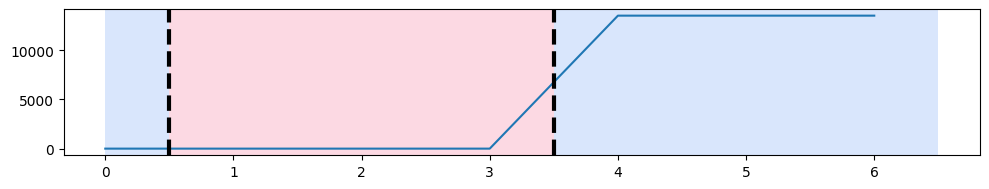

hiFreq_float 7 [1, 4, 7] 6914


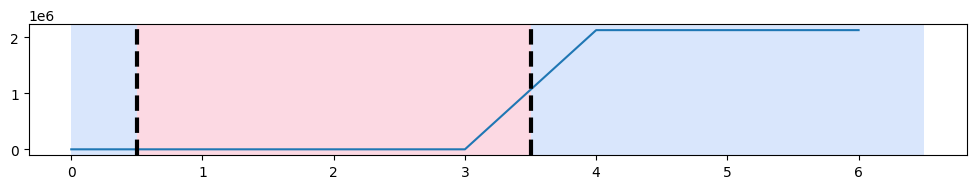

loFreq_float 7 [1, 4, 7] 6914


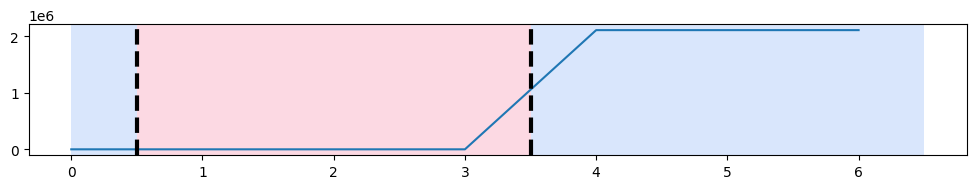

IBW_float 7 [1, 4, 7] 6914


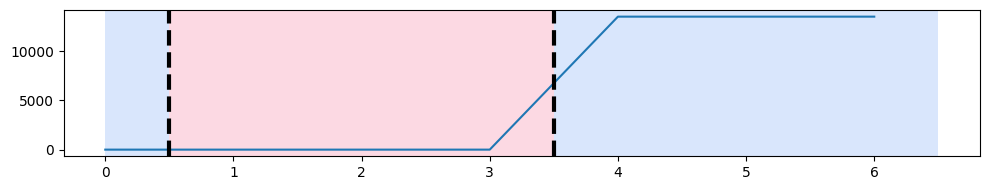

fbs_float 7 [1, 4, 7] 6914


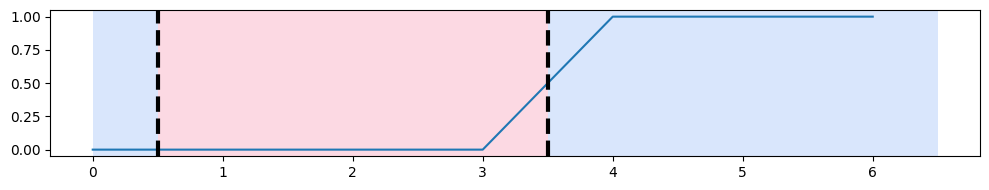

Mode_float 7 [1, 4, 7] 6914


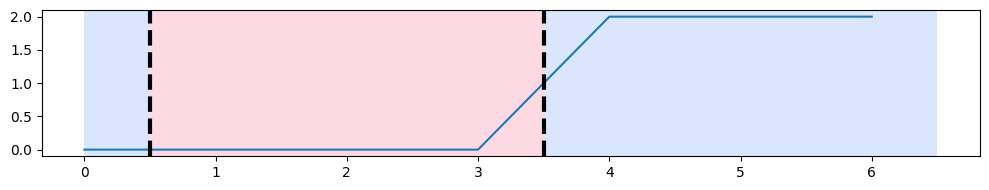

ClippAbsValue_float 7 [1, 4, 7] 6915


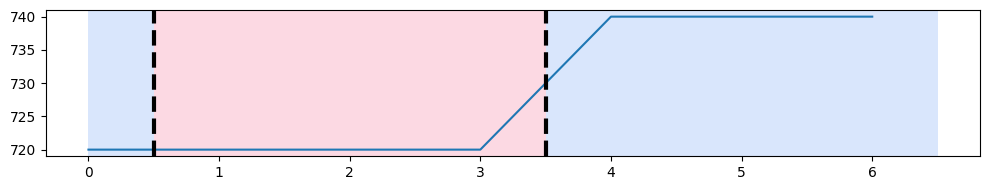

no_float 7 [1, 4, 7] 6915


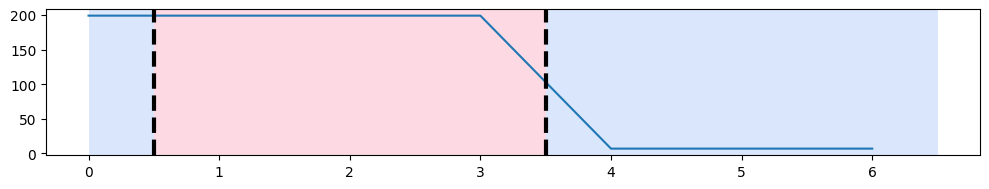

freq_float 4 [2, 3, 4] 7082


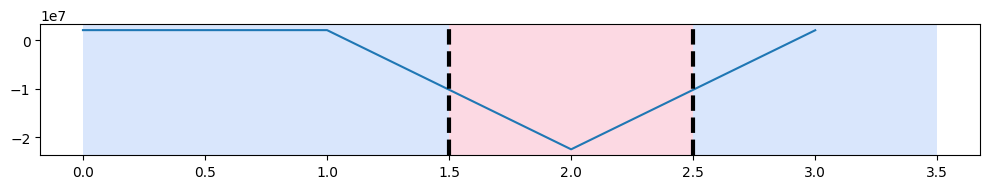

list_float 19 [12, 13, 19] 15518


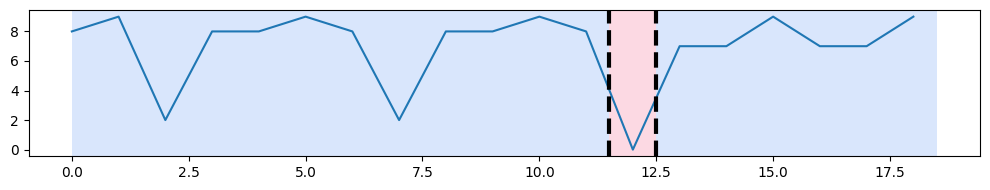

elapsed_ms_float 4 [1, 3, 4] 15605


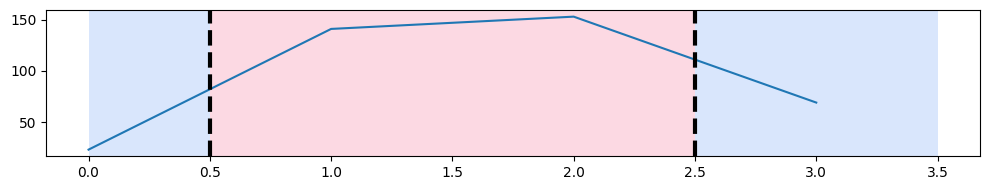

avgIMpa0_float 4 [1, 2, 4] 16400


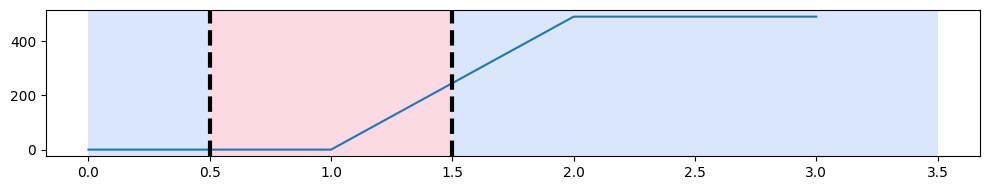

txAtt_float 4 [1, 2, 4] 16400


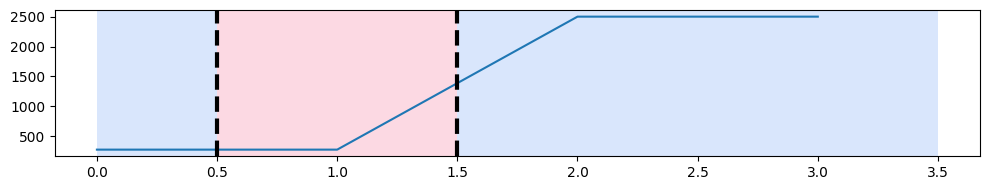

In [3]:
filter_strs = ['id', '.cc']

res_key_value = text_analysis_model.alias_data['insight_branchJ'].res_key_value
for key in res_key_value.keys():
    # if key == 'txAtt_float':
    #     print(key)
    if (res_key_value[key]['type'] == 'float') | (res_key_value[key]['type'] == 'int'):
        flag =  True
        for c in filter_strs:
            if c in key.lower():
                flag = False

        if key[0].isdigit():
            flag = False

        y = []
        glins = []
        for index, t in enumerate(res_key_value[key]['timestamp']):
            if t < timestamp:
                y.append(res_key_value[key]['value'][index])
                glins.append(res_key_value[key]['global_index'][index])
            else:
                break

        if (len(y) <= 3) | (len(set(y)) <= 1):
            flag = False

        if flag:
            data = pd.DataFrame(y, columns=['y'])
            signal = np.array([[i] for i in data['y']])
            algo = rpt.Dynp(model="l2", min_size=1, jump=1).fit(signal)
            result = algo.predict(n_bkps=2)
            print(key, len(y), result, glins[0])
            rpt.display(signal, result, result)
            plt.show()

In [ ]:
for index, item in enumerate(text_analysis_model.alias_data['insight_branchJ'].res_key_value)

In [ ]:
import re
import json
from text_analysis import TextAnalysisModel

text_analysis_model = await TextAnalysisModel('parallel', mode = 'test')

file_path = ['D:\\projects\\ericsson_flow\\ELOG_READ_FULL_ENM3\\DL_BAYAHBARATCISIIH_GH.log']
config_path = 'D:\\Projects\\ericsson_flow\\new_files\\cooper_config1.txt'

await text_analysis_model.file_container_model.on_new_file('', file_path)
await text_analysis_model.file_container_model.on_load_config('', config_path)

for key in text_analysis_model.alias_data.keys():
    if 'Name' in key:
        print(key, text_analysis_model.alias_data[key].res_key_value)
    

In [ ]:
result = False
if ('packname' in text_analysis_model.alias_data['PackageName'].res_key_value) & ('errorname' in text_analysis_model.alias_data['ErrorName'].res_key_value):
    for item in text_analysis_model.alias_data['ErrorName'].res_key_value['errorname']['timestamp']:
        if text_analysis_model.alias_data['PackageName'].res_key_value['packname']['timestamp'][0] < item:
            result = True        
else:
    result = 'unknow'
result

In [ ]:
table = self.text_analysis_model.batch_statistic_model.table
tt = table.loc[(table['BeforeError'] == True) & (table['AfterError'] == False),:]
self.result = len(tt) / len(table)

In [ ]:
self.text_analysis_model.batch_statistic_model.table.to_csv('D:\\projects\\ericsson_flow\\test.csv', index=False)

In [ ]:
self.result = False
if ('packname' in self.text_analysis_model.alias_data['PackageName'].res_key_value) & ('errorname' in self.text_analysis_model.alias_data['ErrorName'].res_key_value):
    for item in self.text_analysis_model.alias_data['ErrorName'].res_key_value['errorname']['timestamp']:
        if self.text_analysis_model.alias_data['PackageName'].res_key_value['packname']['timestamp'][0] > item:
            self.result = True        
else:
    self.result = 'unknow'

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
def self_clean_special_symbols(text, symbol):
    for ch in ['.', '_','-']:
        if ch in text:
            text = text.replace(ch,symbol)
    text = re.sub(r'\d+', '', text)
    return re.sub(symbol+"+", symbol, text)
        
def camel_case_split(s):
    idx = list(map(str.isupper, s))
    # mark change of case
    l = [0]
    for (i, (x, y)) in enumerate(zip(idx, idx[1:])):
        if x and not y:  # "Ul"
            l.append(i)
        elif not x and y:  # "lU"
            l.append(i+1)
    l.append(len(s))
    # for "lUl", index of "U" will pop twice, have to filter that
    return [s[x:y].lower() for x, y in zip(l, l[1:]) if x < y]

special_words = set(['timeout', 'fault', 'error', 'abn', 'shutdown', 'deactivate' , 'activate'])
for index, item in enumerate(text_analysis_model.alias_data['insight_branchI'].outlier):
    if item['abnormal_type'] == 'UniquePrint':
        t = self_clean_special_symbols(item['value'], ' ')
        tmpwords = t.split(' ')
        words = []
        [words.extend(camel_case_split(word)) for word in tmpwords]
        doc = nlp(' '.join(words))
        pos = [w.pos_ for w in doc]
        flag = True if len(set(pos).intersection(set(['VERB', 'AUX']))) > 0 else False
        flag = True if len(set(words).intersection(special_words)) > 0 else flag
        if flag == True:
            print(index, flag, item['value'], re.findall('msg = "(.*?)"', item['origin']), set(pos))
#         print(index, item['abnormal_type'], item['value'], re.findall('msg = "(.*?)"', item['origin']))
        
# camel_case_split('IPaddress')
# doc = nlp("77868817us")
# print([(w.text, w.pos_) for w in doc]) 39

In [ ]:
re.sub(r'\d+', '',"hello 42 I'm a 32 string 30")

In [ ]:
doc = nlp("Training Signal sequence successfully done Activated")
print([(w.text, w.pos_) for w in doc])

In [ ]:
import re
import json
from text_analysis import TextAnalysisModel

text_analysis_model = await TextAnalysisModel('parallel', mode = 'test')

dir_path = 'D:\\projects\\ericsson_flow\\batch_test'
config = 'D:\\projects\\ericsson_flow\\new_files\\config2.txt'

await text_analysis_model.file_container_model.batch_insight_model.new(dir_path, config)

In [ ]:
text_analysis_model.file_container_model.batch_insight_model.result.loc[1, 'resOutlier']

In [ ]:
text_analysis_model.file_container_model.batch_insight_model.samples

In [ ]:
tmp = text_analysis_model.file_container_model.batch_insight_model.result
res = tmp.loc[(tmp['fileName'] == 'E55H060478_LE_JLADANSUKAHATI_CBX_PL_BXP_6_telog.log'), :].reset_index(drop=True).loc[0, :]
dict(res)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

X = pd.DataFrame([[0,22],[0,22],[0,22],[0,255],[0,255],[0,255]])
cost =[]
for i in range(1, 4):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(X)

    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)
    
# plot the cost against K values
plt.plot(range(1, 4), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization

def splita(df):
    return df['Month,#Passengers'].split(',')[0]

def splitb(df):
    return df['Month,#Passengers'].split(',')[1]
    
path = 'AirPassengers.csv'
df = pd.read_csv(path)
df['Month'] = df.apply(splita, axis=1)
df['#Passengers'] = df.apply(splitb, axis=1)
df = df.drop(columns=['Month,#Passengers'])
df.columns = ['Date','Number of Passengers']


In [ ]:
import numpy as np
import pandas as pd

data = [200 if i % 2 == 0 else 150 for i in range(100)]
data = pd.DataFrame(data, columns=['y'])
# data.loc[0:50, 'y'] = 22
# data.loc[51, 'y'] = 255
data.loc[52:100, 'y'] = 100
data = data.reset_index()
data = data.rename(columns={'index':'x'})
data

In [ ]:
import statsmodels.formula.api as smapi
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(data['y'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(data['y'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [ ]:
res = [0 if str(i) == 'nan'  else i for i in additive_decomposition.resid]
res = pd.DataFrame(res, columns=['y'])
res = res.reset_index()
res = res.rename(columns={'index':'x'})

regression = smapi.ols("data ~ x", data=dict(data=res['y'], x=res['x'])).fit()
test = regression.outlier_test()
test[test['bonf(p)'] < 0.5]

In [ ]:
import socketio
sio = socketio.AsyncClient(reconnection=False)
await sio.connect('http://127.0.0.1:8000', namespaces=['/TextAnalysis/FileContainer'])
# standard Python
# sio = socketio.Client()
# sio.connect('http://127.0.0.1:8000', namespaces=['/TextAnalysis/FileContainer'])

In [ ]:
await sio.emit('new_file', ['D:\\Projects\\ericsson_flow\\new_files\\E55G948878_LE_SARONGGE_BXP_6_telog.log'], namespace='/TextAnalysis/FileContainer')

In [ ]:
await sio.emit('load_config', 'D:\projects\\ericsson_flow\\new_files\\config1.txt', namespace='/TextAnalysis/FileContainer')

In [ ]:
sio.disconnect()

In [ ]:
# await sio.disconnect
sio = socketio.AsyncClient(reconnection=False)
await sio.connect('http://127.0.0.1:8000', namespaces=['/TextAnalysis/FileContainer', '/TextAnalysis/FileContainer/LE_PELAUKAN_PL.log_BXP_5_telog.log/TextFileFunction/StatisticFunction/statistic_branchA'])

In [ ]:
sio.connection_namespaces

In [ ]:
def printm(model):
    print(model)

await sio.emit('model', namespace='/TextAnalysis/FileContainer/LE_PELAUKAN_PL.log_BXP_5_telog.log/TextFileFunction/StatisticFunction/statistic_branchA', callback=printm)

In [ ]:
data

In [ ]:
sio.emit?